In [2]:
import cbpro as gdax
import numpy as np
import json
import math
from time import sleep
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def process_book(book, scale=1.0):
  asks = book['asks']
  bids = book['bids']

  askv = 0
  for ask in asks:
    diff = float(ask[0]) - float(asks[0][0])
    askv += math.exp(-diff * scale) * float(ask[1])

  bidv = 0
  for bid in bids:
    diff = float(bid[0]) - float(bids[0][0])
    bidv += math.exp(diff * scale) * float(bid[1])

  return askv, bidv

In [44]:
vals = []
vals_upper = []
vals_lower = []
bids = []
asks = []
diffs = []
diffs_sum = 0
diffs_int = []

with open('./pob.json', 'r') as f:
  for book_string in f:
    book = json.loads(book_string)
    val = (float(book['asks'][0][0]) + float(book['bids'][0][0])) / 2.0
    ask, bid = process_book(book, scale=0.001)

    vals.append(val)
    vals_upper.append(val * 1.0025)
    vals_lower.append(val * 0.9975)
    bids.append(bid)
    asks.append(ask)
    diff = (bid-ask)/(bid+ask)
    diffs.append(diff)
    diffs_sum += diff
    diffs_int.append(diffs_sum) 
    
    

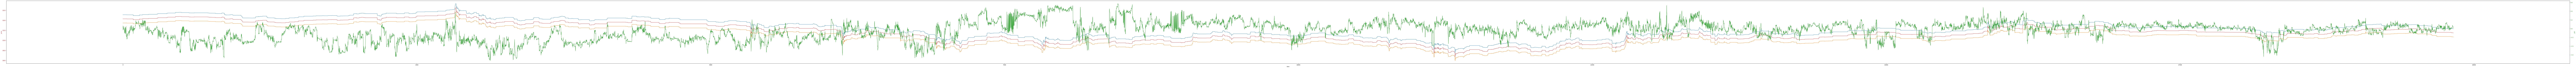

In [45]:
fig, ax1 = plt.subplots()
fig.set_size_inches(300, 8)

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('price', color=color)
ax1.plot(vals, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(vals_upper)
ax1.plot(vals_lower)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('pob', color=color)  # we already handled the x-label with ax1
ax2.plot(diffs, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#ax2.plot(asks, color='tab:green')

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.show()